#Artificial Neural Networks

___
### An explanation of neural networks
Modelled after biological neurons (or brain cells) a neural network consists of an input layer, one or more hidden layers and an output layer. 
<tr>
<td><img src="NN_1.jpg" width="300" height="200" alt="">
<tr>
Suppose the input is written as a vector: $x=(x_1,x_2,x_3)$ say. Then the first neuron of the neural network would evaluate a function like $w_1*x_1+w_2*x_2+w_3*x_3+b$ or in short w.x+b where the vector $w=(w_1,w_2,w_3)$ is called the weight vector and b is called a bias. Then it would apply an activation function to the result which basically says stick with the result it if it greater than 0 or stay 0. The second neuron of the hidden layer does the same except with its own set of weights and bias, and so on. Finally an activation function is applied to the result of $wx+b$: this is a simple function like Relu that says that if the result is below 0 then let the neuron hold the value 0. To go from the hidden layer to the output layer the same thing happens, so there is another set of weights and biases. The activation function used for the output layer is different - also very simple, called softmax - which turns the numbers into probabilities of it being one out of a certain number of classes that we are trying to identify. These functions introduce a required non-linearity in the solution and have been found to work very well in practice for all kinds of problems. The best thing about neural networks is that it is so generally applicable. [This](https://www.youtube.com/watch?v=aircAruvnKk) video by 3Blue1Brown is a nice explaination of neural networks.
    
<tr>
<td><img src="NN_2_wba.jpg" width="300" height="200" alt="">
<td><img src="relu+sigmoid.jpg" width="300" height="200" alt="">
<td><img src="softmax.jpg" width="300" height="200" alt="">
<tr>    
    
The idea is to randomly initiate the weights and the biases and evaluate the output. The difference between the evaluated output and the actually output (expected, given the data) is known as the loss function. One tries to minimize the loss function by trying different weights and biases to get close to the desired outcome. Calculus guides the algorithm to a solution pretty quickly in most cases. This is how we have a model: the network has learnt the parameters of the model (the weights and biases) and is able to "recognize" an image. Training consists of being able to recognize the many images in the training set. Testing then consists to predicting the probabilities that a given test image is one of the objects the network has been trained to recognize. The highest probability result is its prediction with a certain confidence as given by the probability. 
    
One can set the number of hidden layers, the number of neuron in each layer, the learning rate (that is the amount by which we update our weights and biases each time), or run a grid search to find the best values for these.     
    
This method is so general that it is used for the recognition and classification of digits, characters, images - human faces or other objects, speech, sentiment etc. More generally such methods help computers understand any information that we feed it (audio, images, videos). This field is generally known as computer vision. Very detailed models have been developed by processing large amounts of data on very powerful computers.     
    
___
### See it in action - a simple application - digit recognition
    
In the code below, we will load a data set and have a first look at it.
    
We will then apply a convolution neural network to identify the hand written digits. 
___ 
### References / Further reading    
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
https://www.youtube.com/watch?v=aircAruvnKk  

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


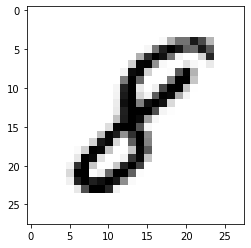

In [3]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


We are going to use the Keras library to implement a neural network. Since in this case we are working with images, we need to use a Convolution neural network.
<tr>
<td><img src="CNN.jpeg" width="600" height="200" alt="">
<tr>

This network has at least one Convolution layer which runs a filter of size (3,3) or (5,5) across and down the image to pull out a certain type of feature from the image - such as maybe a horizontal or a vertical edge. Our particular command below asks for 28 filters to be used. We don't need to specify the filters (or what sort of features to look for). The elements of each filter are parameters that the algorithm will determine given the input images and the particular task it is trying to achieve. Here we have used just one convolution layer but if the images are more complex then multiple convolution layers are used, with the number of filters typically increasing deeper into the network.
<tr>
<td><img src="CNN_1.jpg" width="400" height="200" alt="">
<tr>

The next layer used here is a MaxPooling layer to downsample but retain information about the most distinct feature detected in a part of the image. 
<tr>
<td><img src="maxpooling.jpg" width="400" height="200" alt="">
<tr>
    
Once the layers above have pulled out important spatial features from the image, these are now flattened out and fed as inputs to a regular (fully connected) neural network (here known as Dense layers) so the network can learn to associate the features with the given classifications. If multiple fully connected layers are used, sometimes one uses Dropout in between; which randomly drops out the output of some fraction of neurons in the previous layer to avoid overfitting. Overfitting refers to fitting to such irrelevant details in the images in the training set that they do not help when classifying new or test images. Mathematically, it find the best weights and biases that minimize the discrepancy (called loss) between the label it comes up with and the given real labels. The optimizer is the method used to arrive that this solution. Since the solution is arrived at iteratively, running through the NN part once doesn't always give the global solution, and one needs to run the NN for multiple epochs to see if the solution is changing to a better one.
    
<tr>
<td><img src="CNN_MNIST.jpeg" width="600" height="400" alt="">
<tr>    

In [6]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3511 - accuracy: 0.8959
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0571 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0414 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0332 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0211 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9832


[0.07537046819925308, 0.9832000136375427]

In [216]:
from PIL import Image
import numpy as np
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

folder= '/Users/piamukherjee/Ayanpics/'
photos, labels = list(), list()
for i in range(1,20):
    filename=folder+'pic'+str(i)+'.jpg'
    photo = load_img(filename, target_size=(500, 500))
    # convert to numpy array
    photo = img_to_array(photo)
    output=1.0
    photos.append(photo)
    labels.append(output)
    
folder= '/Users/piamukherjee/Akipics/'
for i in range(1,12):
    filename=folder+'pic'+str(i)+'.jpg'
    photo = load_img(filename, target_size=(500, 500))
    # convert to numpy array
    photo = img_to_array(photo)
    output=0.0
    photos.append(photo)
    labels.append(output)
    
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)

photos=photos/255.
print(photos.shape, labels.shape)

(30, 500, 500, 3) (30,)


In [173]:
save('Ayan_vs_Aki_photos.npy', photos)
save('Ayan_vs_Aki_labels.npy', labels)

In [174]:
from numpy import load
photos = load('Ayan_vs_Aki_photos.npy')
labels = load('Ayan_vs_Aki_labels.npy')
print(photos.shape, labels.shape)

(30, 200, 200, 3) (30,)


In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.20)

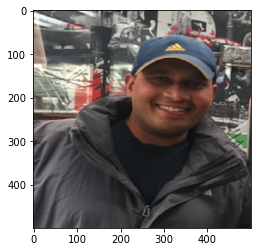

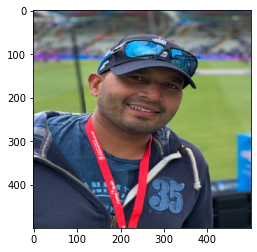

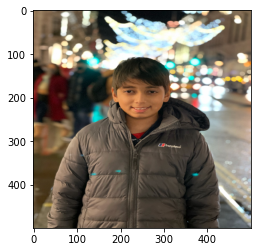

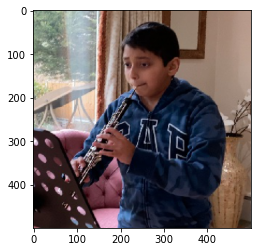

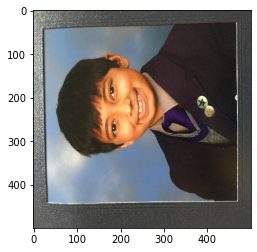

In [226]:
for i in range(0,5):
    plt.imshow(X_test[i])
    plt.show()

In [263]:
# define cnn model
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(500, 500, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [264]:
# define model
model = define_model()

In [265]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.8877 - accuracy: 0.4583
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 154.3006 - accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 39.4029 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 50.4328 - accuracy: 0.4583
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 27.1845 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 2.2825 - accuracy: 0.7917
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 5.2557 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 4s 4s/step - loss: 3.3237 - accuracy: 0.7083
Epoch 9/10
1/1 [==============================] - 4s 4s/step - loss: 0.7826 - accuracy: 0.8333
Epoch 10/10
1/1 [==============================] - 4s 4s/step - loss: 1.0804 - accuracy: 0.8750


In [266]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 361ms/step - loss: 0.7944 - accuracy: 0.8333


[0.7943815588951111, 0.8333333134651184]

I am 96.66% sure this is a Aki


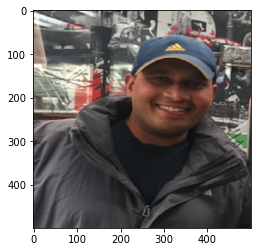

I am 98.90% sure this is a Aki


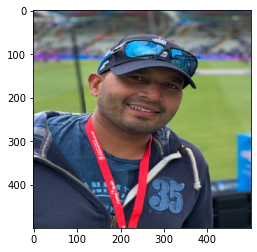

I am 100.00% sure this is a Ayan


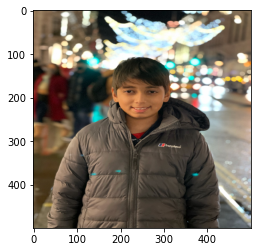

I am 85.47% sure this is a Ayan


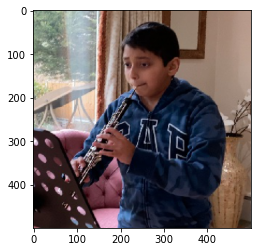

I am 98.80% sure this is a Aki


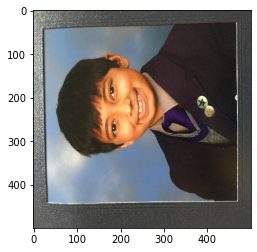

In [267]:
predictions=model.predict(X_test)
for i in range(0,5):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Ayan'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Aki'.format(1-predictions[i][0]))
        
    plt.imshow(X_test[i])
    plt.show()

In [278]:
from keras.preprocessing.image import ImageDataGenerator


folder= '/Users/piamukherjee/Ayanpics/'
for i in range(1,19):
    filename=folder+'pic'+str(i)+'.jpg'
    img = load_img(filename, target_size=(500, 500))        
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)

    n = 0
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    for batch in datagen.flow(x, batch_size=1,save_to_dir='previewAyan', save_prefix='Ayan', save_format='jpg'):
        n += 1
        if n > 10:
            break

In [290]:
from keras.preprocessing.image import ImageDataGenerator


folder= '/Users/piamukherjee/Akipics/'
for i in range(1,12):
    filename=folder+'pic'+str(i)+'.jpg'
    img = load_img(filename, target_size=(500, 500))        
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)

    n = 0
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    for batch in datagen.flow(x, batch_size=1,save_to_dir='previewAki', save_prefix='Aki', save_format='jpg'):
        n += 1
        if n > 10:
            break

In [304]:
import re
pattern = r".jpg"
file='Aki.jpg'
print(file[-4:])
print(re.match(pattern,file[-4:]))

.jpg
<re.Match object; span=(0, 4), match='.jpg'>


In [306]:
import re

photos, labels = list(), list()
pattern = r".jpg"


folder= '/Users/piamukherjee/previewAyan/'    
for file in listdir(folder):
#    print(file)
    if(re.match(pattern,file[-4:])):
        photo = load_img(folder+file, target_size=(500, 500))
        # convert to numpy array
        photo = img_to_array(photo)
        output=1.0
        photos.append(photo)
        labels.append(output)
    
folder= '/Users/piamukherjee/previewAki/'
for file in listdir(folder):   
#    print(file)
    if(re.match(pattern,file[-4:])):
        photo = load_img(folder+file, target_size=(500, 500))
        # convert to numpy array
        photo = img_to_array(photo)
        output=0.0
        photos.append(photo)
        labels.append(output)
    
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)

photos=photos/255.
print(photos.shape, labels.shape)

(318, 500, 500, 3) (318,)


In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.20)

In [308]:
# define model
model = define_model()

In [310]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
8/8 [==============================] - 45s 6s/step - loss: 0.5916 - accuracy: 0.7638
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 0.1868 - accuracy: 0.9764
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 0.0722 - accuracy: 0.9843
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 0.0179 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 37s 5s/step - loss: 0.0069 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 36s 4s/step - loss: 0.0054 - accuracy: 0.9961
Epoch 7/10
8/8 [==============================] - 36s 4s/step - loss: 0.0104 - accuracy: 0.9961
Epoch 8/10
8/8 [==============================] - 36s 4s/step - loss: 0.0062 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 36s 5s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 38s 5s/step - loss: 4.5412e-04 - accuracy: 1.0000


In [311]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 3s 1s/step - loss: 0.6364 - accuracy: 0.7969


[0.63644939661026, 0.796875]

I am 96.23% sure this is a Ayan


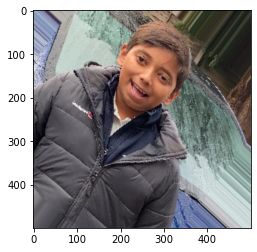

I am 98.56% sure this is a Aki


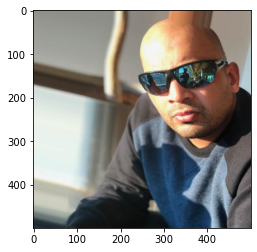

I am 100.00% sure this is a Ayan


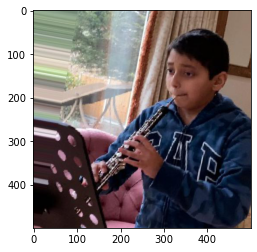

I am 96.25% sure this is a Ayan


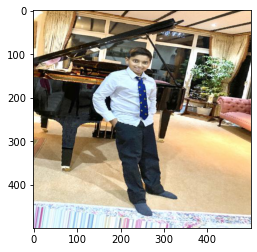

I am 81.87% sure this is a Aki


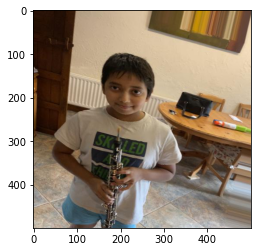

In [312]:
predictions=model.predict(X_test)
for i in range(0,5):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Ayan'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Aki'.format(1-predictions[i][0]))
        
    plt.imshow(X_test[i])
    plt.show()

In [277]:
from os import makedirs
dataset_home = 'dataset_Ayan_vs_Aki/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
# create label subdirectories
    labeldirs = ['Ayan/', 'Aki/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [178]:
import random
#seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('Ayan'):
        dst = dataset_home + dst_dir + 'Ayan/'  + file
        copyfile(src, dst)
    elif file.startswith('Aki'):
        dst = dataset_home + dst_dir + 'Aki/'  + file
        copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'train/'

In [ ]:
img = Image.open("/Users/piamukherjee/Ayanpics/pic12.jpg")
resized_img = img.resize((128, 128))
plt.imshow(resized_img, cmap='Greys')

#for i in os.listdir('/Users/piamukherjee/Ayanpics/'): print(i)
x_train = []
img = Image.open("/Users/piamukherjee/Ayanpics/pic1.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])

In [137]:
img = Image.open("/Users/piamukherjee/Ayanpics/pic2.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic3.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic4.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic5.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic6.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic7.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic8.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic9.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic12.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])

img = Image.open("/Users/piamukherjee/Akipics/pic1.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic2.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic3.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic4.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic5.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic6.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic7.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic8.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic9.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic10.jpg")
resized_img = img.resize((128, 128))
x_train.append([np.array(resized_img)])

x_test=[]
img = Image.open("/Users/piamukherjee/Ayanpics/pic15.jpg")
resized_img = img.resize((128, 128))
x_test.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic16.jpg")
resized_img = img.resize((128, 128))
x_test.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic17.jpg")
resized_img = img.resize((128, 128))
x_test.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Ayanpics/pic18.jpg")
resized_img = img.resize((128, 128))
x_test.append([np.array(resized_img)])
img = Image.open("/Users/piamukherjee/Akipics/pic11.jpg")
resized_img = img.resize((128, 128))
x_test.append([np.array(resized_img)])


In [138]:
y_train=[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
y_test=[1,1,1,1,0]

In [139]:
print(len(x_train))

20


In [140]:
X_train=np.array(x_train)
X_train.shape

(20, 1, 128, 128, 3)

In [141]:
X_train=np.moveaxis(X_train, 1, -1)

In [142]:
X_train.shape

(20, 128, 128, 3, 1)

In [143]:
X_train=np.squeeze(X_train,axis=4)

In [144]:
X_train.shape

(20, 128, 128, 3)

In [145]:
X_test=np.array(x_test)
X_test.shape

(5, 1, 128, 128, 3)

In [146]:
X_test=np.moveaxis(X_test, 1, -1)
X_test.shape

(5, 128, 128, 3, 1)

In [147]:
X_test=np.squeeze(X_test,axis=4)

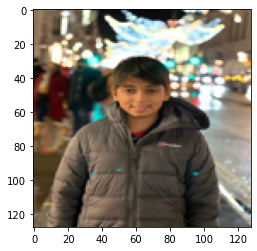

In [149]:
plt.imshow(X_train[1])

In [150]:
Y_train=np.array(y_train)
Y_test=np.array(y_test)
Y_train.shape

(20,)

In [116]:
# Reshaping the array to 4-dims so that it can work with the Keras API
#x_train = x_train.reshape(x_train.shape[0], 128, 128, 1)
#x_test = x_test.reshape(x_test.shape[0], 128, 128, 1)
input_shape = (128, 128, 3)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (20, 128, 128, 3)
Number of images in x_train 20
Number of images in x_test 5


In [151]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.sigmoid))

In [152]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=Y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 422ms/step - loss: 12.0652 - accuracy: 0.3000
Epoch 2/20
1/1 [==============================] - 0s 110ms/step - loss: 7.2615 - accuracy: 0.5500
Epoch 3/20
1/1 [==============================] - 0s 115ms/step - loss: 6.5457 - accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 0s 107ms/step - loss: 2.4933 - accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 108ms/step - loss: 3.3947 - accuracy: 0.5500
Epoch 6/20
1/1 [==============================] - 0s 111ms/step - loss: 3.3888 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 112ms/step - loss: 4.2496 - accuracy: 0.4500
Epoch 8/20
1/1 [==============================] - 0s 108ms/step - loss: 2.6022 - accuracy: 0.6000
Epoch 9/20
1/1 [==============================] - 0s 109ms/step - loss: 8.0274 - accuracy: 0.4500
Epoch 10/20
1/1 [==============================] - 0s 115ms/step - loss: 8.8130 - accuracy: 0.4500
Epoch 11/20
1/1 [=

In [153]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 133ms/step - loss: 3.9168 - accuracy: 0.8000


[3.91676664352417, 0.800000011920929]

In [154]:
predictions = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 59ms/step


In [155]:
print(predictions)

[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]]


I am 100.00% sure this is a Ayan


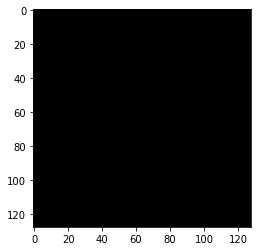

I am 100.00% sure this is a Ayan


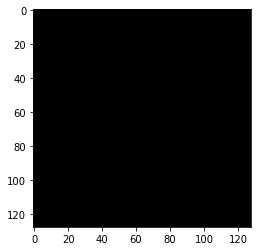

I am 100.00% sure this is a Ayan


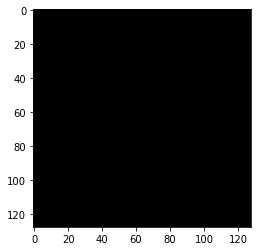

I am 100.00% sure this is a Ayan


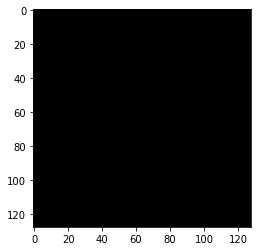

I am 100.00% sure this is a Ayan


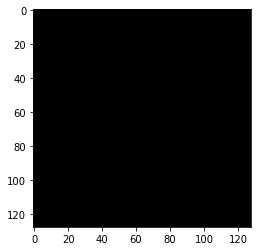

In [128]:
for i in range(0,5):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Ayan'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Aki'.format(1-predictions[i][0]))
        
    plt.imshow(X_test[i])
    plt.show()